# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

pour faire plaisir à William, il est demandé de mettre des titres. Faites attention car il a tendance à devenir grumpy si on ne le fait pas 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

Our library

In [2]:
from proj1_helpers import *
from data_utility import *
from Regressions import *

### Exploratory Data loading

In [3]:
y, X, ids = load_csv_data('../Data/train.csv')


In [4]:
print('Y shape : ', y.shape)
print('X shape : ', X.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


### Removal of -999 datas

In [ ]:
keepers = np.ones(X.shape[1], dtype=bool)
keepers[[4,5,6,12,26,27,28]] = 0

x = X[:,keepers]

print(x.shape)

## which Definition

In [ ]:
which = [6,17,22] #Change according to desired features in tests

### Scatter plots

In [ ]:
scatter(x,which, other_f= True, against=x[:,6])

### Histograms

In [ ]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

In [ ]:
for i in which:
    feature = x[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

In [ ]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

In [ ]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [ ]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    if percentage > 60:
        print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

# Regression

Abandoned GD and SGD for least squares (pointless to lose time having explicit form solution)

### Data loading

In [3]:
y_tr, X_tr, ids_tr = load_csv_data('../Data/train.csv')
y_te, X_te, ids_te = load_csv_data('../Data/test.csv')

preliminary Data treatment

In [4]:
n,p = X_tr.shape
keepers = np.ones(p, dtype=bool)

for i in range(p):
    percentage = len(np.where(X_tr[:,i] ==-999)[0])/n*100
    if percentage > 70:
        keepers[i] = 0

print("Removed features: \n",np.where(keepers == 0))
x_tr = X_tr[:,keepers]
x_te = X_te[:,keepers]

n,p = x_tr.shape

Removed features: 
 (array([ 4,  5,  6, 12, 26, 27, 28]),)


In [34]:
print(np.mean(x_tr, axis=0).shape)

(23,)


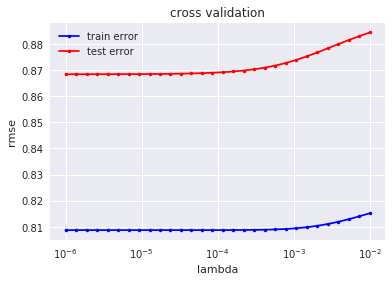

In [39]:
tx = np.c_[np.ones(n),x_tr]
n,p = tx.shape
w = np.zeros(p)
lambdas = np.logspace(-6, -2, 30)
k_fold = 5

# print(ridge_regression(y_tr, x_tr, 1))
w_cv, rmse_tr, rmse_te = cross_validation(y_tr, tx, k_fold, degree=2, lambdas=lambdas)

